In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
base = "CME"
threshold = 3.5

In [3]:
Comparison = pd.read_csv(f"{base} Base Output/DetectionComparison.csv")
Comparison["FI (CME)"] = Comparison["FI (CME)"]/31
if base == "CME":
    sec = "Dino"
if base == "Dino":
    sec = "CME"

In [4]:
M_comp = Comparison.to_numpy()
t_vec = defaultdict(list)

for t in M_comp:
    t_vec[t[0]].append(t)

for t_val in t_vec:
    t_vec[t_val] = np.array(t_vec[t_val]) 

t_list = np.zeros((len(t_vec),3), dtype=object)

In [5]:
for i, t in enumerate(t_vec):
    t_val = t_vec[t]
    counts = len((t_val[:,11]))
    true_counts = (np.sum(t_val[:,11] < threshold))
    t_list[i][0] = int(t)
    t_list[i][1] = counts
    t_list[i][2] = true_counts

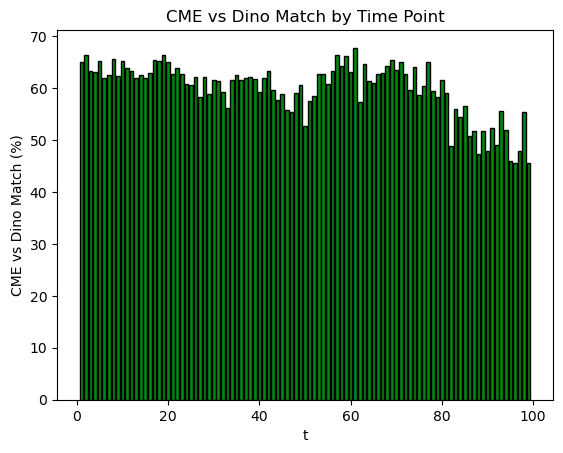

<Figure size 640x480 with 0 Axes>

In [6]:
plt.bar(t_list[:,0], 100*t_list[:,2]/t_list[:,1], color="#028A0F", edgecolor = "black")
plt.xlabel("t")
plt.ylabel(f"{base} vs {sec} Match (%)")
plt.title(f"{base} vs {sec} Match by Time Point")
plt.show()
plt.savefig(f"{base} Base Plots/CME vs Dino Match by Time Point.png")

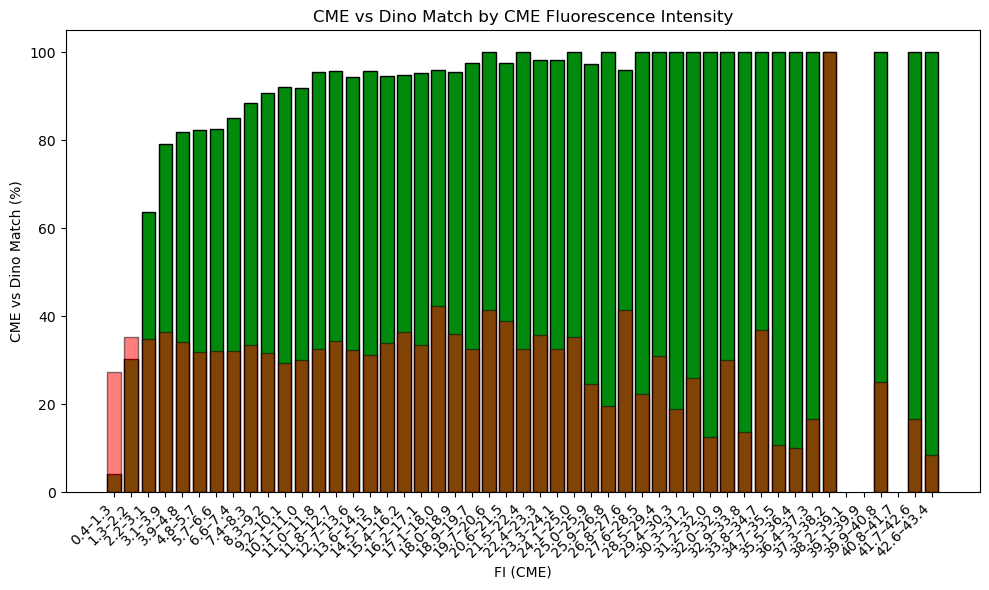

<Figure size 640x480 with 0 Axes>

In [12]:
bins = np.linspace(Comparison[f"FI ({base})"].min(), Comparison[f"FI ({base})"].max(), 50)

Comparison[f"FI_bin"] = pd.cut(Comparison[f"FI ({base})"], bins)
total_per_bin = Comparison.groupby("FI_bin",observed =False).size()
matches_per_bin = Comparison[Comparison["Distance"] < threshold].groupby("FI_bin",observed=False).size()
interval_labels = [f"{round(bins[i],1)}–{round(bins[i+1],1)}" for i in range(len(bins)-1)]
fraction = (matches_per_bin / total_per_bin).values

Comparison_Dbase = pd.read_csv(f"{sec} Base Output/DetectionComparison.csv")
Comparison_Dbase["FI (CME)"] = Comparison_Dbase["FI (CME)"]/31
Comparison_Dbase[f"FI_bin"] = pd.cut(Comparison_Dbase[f"FI ({base})"], bins)
total_per_bin_Dbase = Comparison_Dbase.groupby("FI_bin",observed =False).size()
matches_per_bin_Dbase = Comparison_Dbase[Comparison_Dbase["Distance"] < threshold].groupby("FI_bin",observed=False).size()
fraction_Dbase = (matches_per_bin_Dbase / total_per_bin_Dbase).values

plt.figure(figsize=(10, 6))
plt.bar(interval_labels,100*fraction, color = "#028A0F",edgecolor="black")
plt.bar(interval_labels,100*fraction_Dbase, color = "red",edgecolor="black", alpha = 0.5)
plt.xlabel(f"FI ({base})")
#plt.xlim(0,10)
plt.xticks(rotation=45, ha="right")
plt.ylabel(f"{base} vs {sec} Match (%)")
plt.title(f"{base} vs {sec} Match by {base} Fluorescence Intensity")
plt.tight_layout()
plt.show()
plt.savefig(f"{base} Base Plots/Match by FI.png")

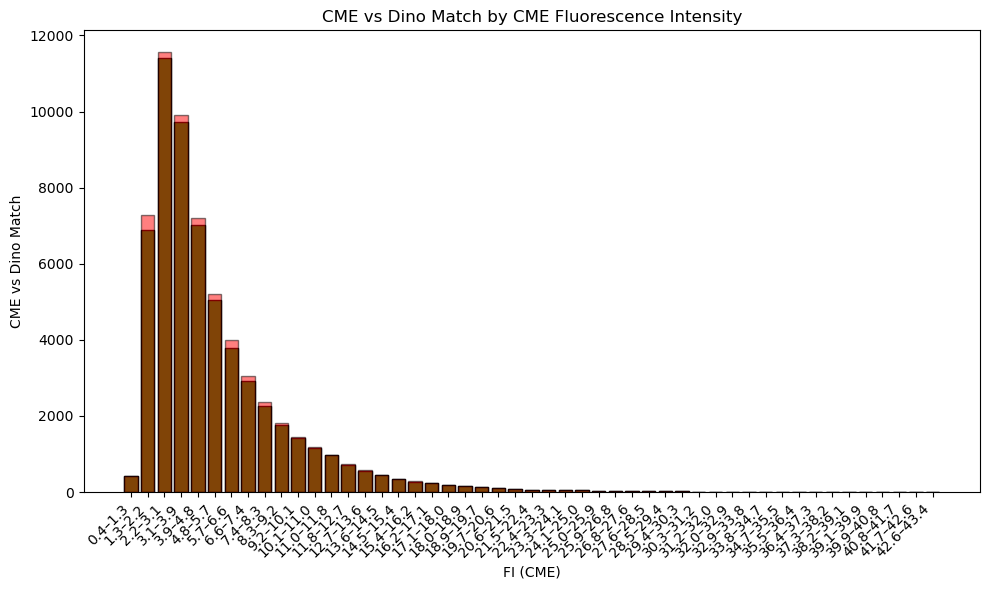

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(interval_labels,matches_per_bin, color = "#028A0F",edgecolor="black")
plt.bar(interval_labels,matches_per_bin_Dbase, color = "red",edgecolor="black", alpha = 0.5)
plt.xlabel(f"FI ({base})")
#plt.xlim(0,10)
plt.xticks(rotation=45, ha="right")
plt.ylabel(f"{base} vs {sec} Match")
plt.title(f"{base} vs {sec} Match by {base} Fluorescence Intensity")
plt.tight_layout()
plt.show()
plt.savefig(f"{base} Base Plots/Match by FI.png")

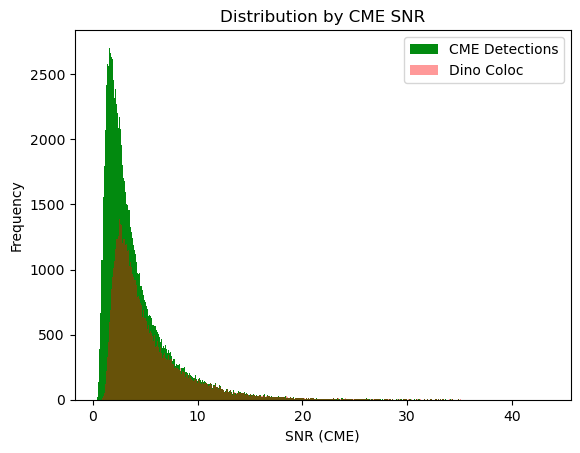

In [29]:
Comparison_CME = pd.read_csv(f"{base} Base Output/DetectionComparison.csv")
Comparison_CME["FI (CME)"] = Comparison_CME["FI (CME)"]/31

Comparison_D = pd.read_csv(f"{base} Base Output/DetectionComparison.csv")
Comparison_D = Comparison_D[Comparison_D["Distance"]<3.5]
Comparison_D["FI (CME)"] = Comparison_D["FI (CME)"]/31

plt.hist(Comparison_CME[f"FI ({base})"], bins = round(max(Comparison_CME[f"FI ({base})"])*10), color="#028A0F", label = "CME Detections")
plt.hist(Comparison_D[f"FI ({base})"], bins = round(max(Comparison_D[f"FI ({base})"])*10), color="red",alpha=0.4, label = "Dino Coloc")
plt.xlabel(f"SNR ({base})")
plt.ylabel("Frequency")
plt.title(f"Distribution by {base} SNR")
plt.legend()
plt.show()